### To print the elapsed time, first get the start time

In [1]:
import time
from datetime import timedelta

start_time = time.time()

In [2]:
import pandas                         as     pd
import numpy                          as     np
import seaborn                        as     sns
import matplotlib.pyplot              as     plt
import statsmodels.api                as     sm
import sys, os, six

from   sklearn                        import  metrics 
from   sklearn.metrics                import  classification_report
from   sklearn.metrics                import  confusion_matrix
from   sklearn.metrics                import  roc_curve, auc
from   sklearn.model_selection        import  train_test_split, cross_val_score
# !pip install pydotplus ### if not available in the Python Environment
import pydotplus

# !pip install pydot ### if not available in the Python Environment
import pydot

## ! pip install  graphviz  ### if not available in the Python Environment

In [3]:
from   sklearn                  import  tree
from   sklearn.tree             import  DecisionTreeClassifier
from   sklearn.tree             import _tree

In [4]:
print("\nCurrent working directory %s" %os.getcwd())

os.chdir(r'C:\DSE-Capstone\DSE-ON-Jan22-G2')


Current working directory C:\DSE-Capstone\DSE-ON-Jan22-G2


In [5]:
def draw_cm( actual, predicted ):
    
    import matplotlib.pyplot as   plt
    import sklearn.metrics   as   metrics
    import seaborn           as   sns
    
    cm = metrics.confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True, fmt='.2f', xticklabels = ["Yes", "No"] , yticklabels = ["Yes", "No"] )
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()   

In [6]:
def draw_roc( actual, probs ):

    import pandas            as   pd
    import numpy             as   np
    import seaborn           as   sns
    import matplotlib.pyplot as   plt
    import sklearn.metrics   as   metrics
    import seaborn           as   sns
    
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
    drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 4))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic curve')
    plt.legend(loc="lower right")
    plt.show()
    return fpr, tpr, thresholds

In [7]:
def draw_decision_tree(model, X, y, flist, classlist, file_name = 'Tree'):
    
    from sklearn.tree            import export_graphviz
    from six                     import StringIO  
    from IPython.core.pylabtools import figsize
    from IPython.display         import Image
    figsize(12.5, 6)
    import pydot

    #dot_data = StringIO()  
    file_name_dot = file_name + '.dot'
    file_name_png = file_name + '.png'
    
    export_graphviz(model, out_file = file_name_dot, feature_names = flist,\
                    class_names = classlist, filled = True, rounded = True)
    (graph,) = pydot.graph_from_dot_file(file_name_dot)
    graph.write_png(file_name_png)
    return Image(file_name_png)

In [8]:
"""
   Function Name: compare_models

   Description: This **function** compares various algorithms on 
                 1) AUROC 2) Precision, 3) Recall
   
   Input: 1) splits for k fold 
          2) random seed number
          3) Training data for predictor variables
          4) Training data for target variable



   Output: Model comparison on these metrics 1) AUROC 2) Metrics - Precision, Recall
   
"""
def compare_models(n_splits, random_state, X, Y):  

    ### To compare algorithms
    
    import  matplotlib.pyplot            as      plt
    from    sklearn.model_selection      import  StratifiedKFold
    from    sklearn.model_selection      import  cross_val_score
    from    sklearn.linear_model         import  LogisticRegression
    from    sklearn.tree                 import  DecisionTreeClassifier
    from    sklearn.naive_bayes          import  GaussianNB
    from    sklearn.ensemble             import  RandomForestClassifier
    
    ### Prepare models
    
    models  = []
    models.append(('LR', LogisticRegression(max_iter=10000))) 
    models.append(('CART', DecisionTreeClassifier()))
    models.append(('NB', GaussianNB()))
    models.append(('RF', RandomForestClassifier()))
    
    
    ### Evaluate model in turn
    
    scores_req =  ['roc_auc', 'precision', 'recall']
    
    for i in range(len(scores_req)):
        names          =   []
        results        =   []
        scoring        =   scores_req[i]
        print(scoring)
        
        for name, model in models:
            print("\n n_splits %d random_state %d" % (n_splits, random_state))        	
            skf            =   StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
            cv_results     =   cross_val_score(model, X, Y, cv = skf, scoring = scoring)
            results.append(cv_results)
            names.append(name)
            msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
            print(msg)
        
        ### Box plot algorithm comparison
        
        sub_title = 'Algorithm Comparison using ' + scoring
        
        fig = plt.figure()
        fig.suptitle(sub_title)
        ax  = fig.add_subplot(111)
        plt.boxplot(results)
        ax.set_xticklabels(names)
        plt.show()

### ------------------------------------------------------------------------------------------

In [9]:
'''
This function returns a set of rules defined in the Decision Tree which is easy to understand
'''
def tree_to_rules(tree, feature_names, class_names):

    left = tree.tree_.children_left
    right = tree.tree_.children_right
    threshold = tree.tree_.threshold
    features = [feature_names[i] for i in tree.tree_.feature]
    value = tree.tree_.value

    def recurse(left, right, threshold, features, node, depth=0):

        indent = "  " * depth

        if (threshold[node] != -2):

            print(indent,"if ( " + features[node] + " <= " + str(threshold[node]) + " ) {")

            if left[node] != -1:

                recurse (left, right, threshold, features, left[node], depth+1)
                print(indent,"} else {")

                if right[node] != -1:
                    recurse (left, right, threshold, features, right[node], depth+1)

                print(indent,"}")

        else:
            if value[node][0,0] > value[node][0,1]:
              classified = class_names[0]
            else:
              classified = class_names[1]
            print(indent,"Class = " + classified)
    recurse(left, right, threshold, features, 0)

### Read data

In [10]:
file_name =  r'C:\DSE-Capstone\DSE-ON-Jan22-G2\Output\transformed-data-2022_07_06_07_34_15.csv'

In [11]:
data     =    pd.read_csv(file_name)
n        =    data.shape[0]  # Get the count of records
print("Dataset has %d rows and %d columns" % (data.shape[0], data.shape[1]))

Dataset has 103904 rows and 25 columns


### Prepare X representing predictor variables and y representing the response variable

In [12]:
y             =    data['satisfaction']
X             =    data.drop(['satisfaction'], axis = 1)     

### Do a spot check of models performance

roc_auc

 n_splits 10 random_state 12345
LR: 0.788174 (0.091598)

 n_splits 10 random_state 12345
CART: 0.945575 (0.002705)

 n_splits 10 random_state 12345
NB: 0.880326 (0.003808)

 n_splits 10 random_state 12345
RF: 0.994049 (0.000518)


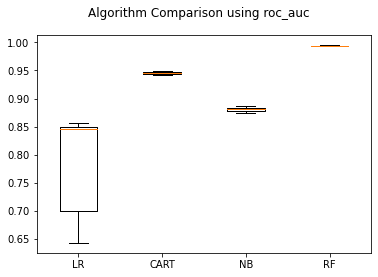

precision

 n_splits 10 random_state 12345
LR: 0.759441 (0.072120)

 n_splits 10 random_state 12345
CART: 0.954352 (0.002903)

 n_splits 10 random_state 12345
NB: 0.841007 (0.004405)

 n_splits 10 random_state 12345
RF: 0.956984 (0.002277)


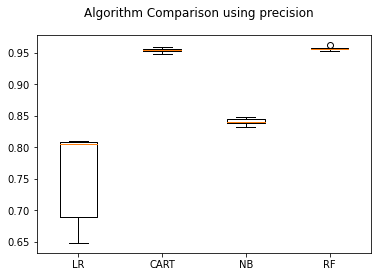

recall

 n_splits 10 random_state 12345
LR: 0.795546 (0.011696)

 n_splits 10 random_state 12345
CART: 0.952122 (0.002438)

 n_splits 10 random_state 12345
NB: 0.814994 (0.006662)

 n_splits 10 random_state 12345
RF: 0.980112 (0.001456)


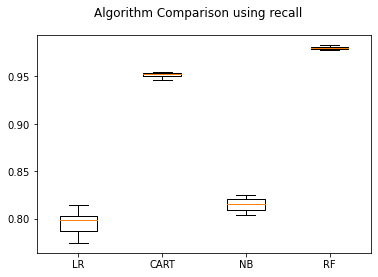

In [13]:
random_state = 12345; n_splits = 10
compare_models(n_splits, random_state, X, y)

### Observations

As we know, *Recall*, the ability of a classification model to identify all data points in a relevant class is very important to us. 

Based on the above comparison chart, we observe that both Decision Tree (CART) and Random Forest models give better predictions and their recall score is above 95%.

### Let us use Decision Tree model as our Base model

#### Split data into training and test datasets

In [14]:
seed      = 1
test_size = 0.30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = seed, stratify = y) 

### Build Decision Tree model

In [15]:
clf    = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf    = clf.fit(X_train,y_train)

### Predict the response for train dataset

In [16]:
predicted_train = clf.predict(X_train)


Training Data
[[31517     0]
 [    0 41215]]


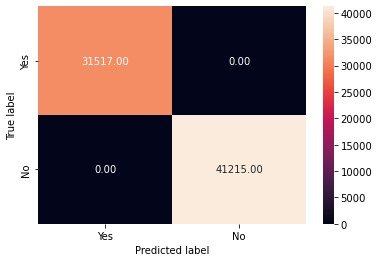

Training Accuracy: 100.000%


In [17]:
matrix             = confusion_matrix(y_train, predicted_train)
print("\nTraining Data")
print(matrix)
draw_cm(y_train, predicted_train)
###     
accuracy_train = clf.score(X_train, y_train) 
print("Training Accuracy: %.3f%%" % (accuracy_train * 100.0))

In [18]:
measures_train     = classification_report(y_train, predicted_train) 
print("\nTraining data")
print(measures_train) 


Training data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     31517
           1       1.00      1.00      1.00     41215

    accuracy                           1.00     72732
   macro avg       1.00      1.00      1.00     72732
weighted avg       1.00      1.00      1.00     72732



#### Predict the response for test dataset

In [19]:
predicted_testing = clf.predict(X_test)


Testing Data
[[12698   810]
 [  910 16754]]


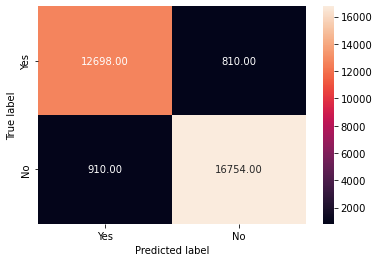

Testing Accuracy: 94.482%


In [20]:
matrix             = confusion_matrix(y_test, predicted_testing)
print("\nTesting Data")
print(matrix)
draw_cm(y_test, predicted_testing )
    
accuracy_train = clf.score(X_test, y_test) 
print("Testing Accuracy: %.3f%%" % (accuracy_train * 100.0))

In [21]:
measures_test     = classification_report(y_test, predicted_testing) 
print("\nTraining data")
print(measures_test) 


Training data
              precision    recall  f1-score   support

           0       0.93      0.94      0.94     13508
           1       0.95      0.95      0.95     17664

    accuracy                           0.94     31172
   macro avg       0.94      0.94      0.94     31172
weighted avg       0.94      0.94      0.94     31172



### Observations

We observe that the performance measures for both training data and test data are in the same range ruling out **Model Overfit**

### Get insights from the model

In [22]:
flist     = X.columns
classlist = ['Satisfied', 'Not Satisfied']

In [23]:
### Plot a tree
draw_decision_tree(clf, X_train, y_train, flist, classlist, file_name = 'Tree')

FileNotFoundError: [WinError 2] "dot" not found in path.

In [ ]:
tree_to_rules(clf1, list(X_train.loc[:,flist]), classlist)